In [1]:
# 1. Install ucimlrepo if not already installed
!pip install ucimlrepo



In [2]:
# 2. Import necessary libraries
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random

In [3]:
# 3. Load a dataset from the UCI repository (Heart Disease as example)
heart = fetch_ucirepo(name="Heart Disease")
X = heart.data.features
y = heart.data.targets.squeeze()

In [4]:
# 4. Preprocess features (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# 5. Define hyperparameter search space
kernels = ['linear', 'rbf', 'poly']
nu_values = np.linspace(0.1, 0.9, 9)
epsilons = np.linspace(0.01, 0.2, 10)

results = []
best_scores = []
best_convergence = []

In [6]:
# 6. Run optimization over 10 random splits
for sample_num in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, stratify=y, random_state=sample_num
    )
    best_acc = 0
    best_params = {}
    acc_progress = []

    for i in range(100):
        kernel = random.choice(kernels)
        nu = random.choice(nu_values)
        epsilon = random.choice(epsilons)

        try:
            model = NuSVC(kernel=kernel, nu=nu)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)

            acc_progress.append(acc)

            if acc > best_acc:
                best_acc = acc
                best_params = {"Kernel": kernel, "Nu": nu, "Epsilon": epsilon}
        except Exception as e:
            acc_progress.append(0)
            continue

    results.append({
        "Sample": f"S{sample_num}",
        "Best Accuracy": round(best_acc * 100, 2),
        "Kernel": best_params.get("Kernel"),
        "Nu": best_params.get("Nu"),
        "Epsilon": best_params.get("Epsilon")
    })
    best_scores.append(best_acc)
    best_convergence.append(acc_progress)

In [7]:
# 7. Save and print results
results_df = pd.DataFrame(results)
results_df.to_csv("optimized_svm_results.csv", index=False)
print(results_df)

  Sample  Best Accuracy Kernel    Nu Epsilon
0     S1              0   None  None    None
1     S2              0   None  None    None
2     S3              0   None  None    None
3     S4              0   None  None    None
4     S5              0   None  None    None
5     S6              0   None  None    None
6     S7              0   None  None    None
7     S8              0   None  None    None
8     S9              0   None  None    None
9    S10              0   None  None    None


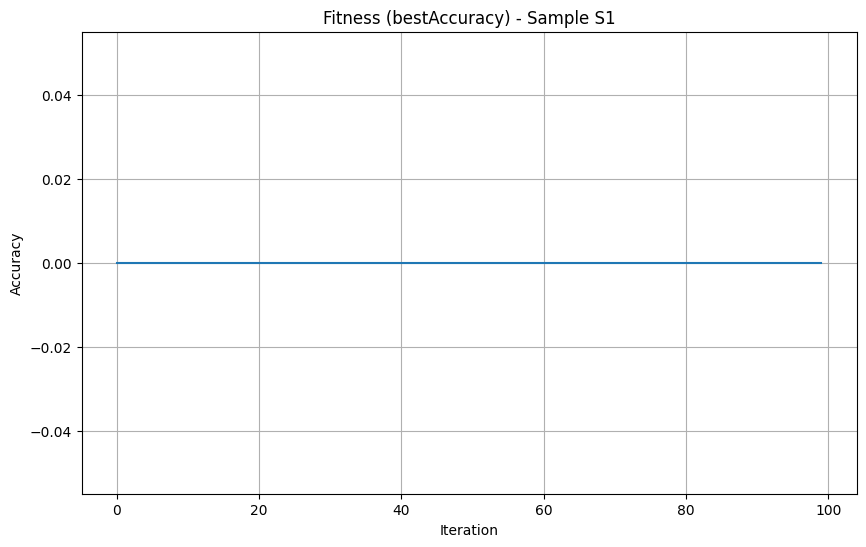

In [8]:
# 8. Plot convergence graph of the best run
best_index = np.argmax(best_scores)
plt.figure(figsize=(10, 6))
plt.plot(best_convergence[best_index])
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title(f"Fitness (bestAccuracy) - Sample S{best_index+1}")
plt.grid(True)
plt.show()